# Code adapted from: 
2021-05-14_sargassum_Clement_WOC_v00_simu_20days_TIME_tests

# Objective: test how to load initial time and position from Miron data

In [1]:
%pylab inline
from parcels import FieldSet, ParticleSet, JITParticle, Variable, AdvectionRK4
import numpy as np
import xarray as xr
from datetime import timedelta as delta
from datetime import datetime, timezone
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# Data explanation:


*Globcurrent products:
* e.g. /data/oceanparcels/input_data/GlobCurrent/v3p0/global_025_deg/total_hs_dailymean/20020101-GLOBCURRENT-L4-CUReul_hs-ALT_SUM-v03.0-fv01.0.nc
<BR> —> eastward_eulerian_current_velocity:long_name = "Absolute geostrophic velocity + hs depth Ekman velocity: zonal component" ;
* /data/oceanparcels/input_data/GlobCurrent/v3p0/global_025_deg/geostrophic_dailymean/20080630000000-GLOBCURRENT-L4-CURgeo_0m-ALT_OI-v03.0-fv01.0.nc
<BR> —> northward_geostrophic_current_velocity:long_name = "Absolute geostrophic velocity: meridian component" ;
* /data/oceanparcels/input_data/GlobCurrent/v3p0/global_025_deg/ekman_hs_dailymean/20080702-GLOBCURRENT-L4-CURekm_hs-ERAWS_EEM-v03.0-fv01.0.nc 
<BR> —> eastward_ekman_current_velocity:long_name = "hs depth Ekman current velocity: zonal component

# --> edit

# Dates sargassum:

In [2]:
nyears = [2018] #05, 2006, 2007, 2008, 2009, 2010]

# Data Miron:

In [3]:
!ls /data/oceanparcels/input_data/Miron_etal_2020/data/d1/

type-0_id-4101647.csv  type-2_id-2590476.csv  type-4_id-2588708.csv
type-1_id-2591504.csv  type-2_id-2591063.csv  type-4_id-2590451.csv
type-1_id-2593999.csv  type-2_id-2591947.csv  type-4_id-2592310.csv
type-1_id-2594008.csv  type-3_id-2588737.csv  type-5_id-2591095.csv
type-2_id-2587305.csv  type-3_id-2590475.csv  type-6_id-4101642.csv


# Join date and time using:
https://towardsdatascience.com/all-the-pandas-read-csv-you-should-know-to-speed-up-your-data-analysis-1e16fe1039f3 
    --> 

In [4]:
df = pd.read_csv('/data/oceanparcels/input_data/Miron_etal_2020/data/d1/' + 'type-1_id-2591504.csv',
                 parse_dates=[['date', 'time']])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 3 columns):
date_time    182 non-null datetime64[ns]
longitude    182 non-null float64
latitude     182 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.3 KB


In [5]:
df

,date_time,longitude,latitude
0,2018-03-12 06:59:59,-61.71927,23.67091
1,2018-03-12 12:59:59,-61.73172,23.71844
2,2018-03-12 19:07:59,-61.75812,23.79761
3,2018-03-13 00:59:59,-61.78439,23.88024
4,2018-03-13 07:05:59,-61.78018,23.94628
5,2018-03-13 13:07:59,-61.76312,23.97797
6,2018-03-13 18:59:59,-61.75500,24.02430
7,2018-03-14 00:59:59,-61.74014,24.08304
8,2018-03-14 06:59:59,-61.73547,24.10934
9,2018-03-14 12:59:59,-61.75500,24.13672


# --> now have to convert to julian days like Clements format, if not can do the opposite ( Clement's data to this format (gregorian)):


In [6]:
df['date_time'][0]

Timestamp('2018-03-12 06:59:59')

In [7]:
date_time_obj = datetime.strptime(str(df['date_time'][0]), '%Y-%m-%d %H:%M:%S')

In [8]:
date_time_obj

datetime.datetime(2018, 3, 12, 6, 59, 59)

# --> cool!

# Load all the type 1 (sargassum like) drifter:

In [9]:
filedir_Miron = '/data/oceanparcels/input_data/Miron_etal_2020/data/'

In [10]:
drifters_list_d1 = [filedir_Miron + 'd1/' + 'type-1_id-2591504.csv',
                    filedir_Miron + 'd1/' + 'type-1_id-2593999.csv',
                    filedir_Miron + 'd1/' + 'type-1_id-2594008.csv']

In [11]:
drifters_list_d2 = [filedir_Miron + 'd2/' + 'type-1_id-2588728.csv',
                    filedir_Miron + 'd2/' + 'type-1_id-2590462.csv',
                    filedir_Miron + 'd2/' + 'type-1_id-2592045.csv']

In [12]:
drifters_list_d3 = [filedir_Miron + 'd3/' + 'type-1_id-2588898.csv',
                    filedir_Miron + 'd3/' + 'type-1_id-2591486.csv',
                    filedir_Miron + 'd3/' + 'type-1_id-2591972.csv']

In [13]:
drifters_list_d4 = [filedir_Miron + 'd4/' + 'type-1_id-2586710.csv',
                    filedir_Miron + 'd4/' + 'type-1_id-2586817.csv',
                    filedir_Miron + 'd4/' + 'type-1_id-2591355.csv']

In [14]:
drifters_list = [drifters_list_d1, drifters_list_d2, drifters_list_d3, drifters_list_d4]

/data/oceanparcels/input_data/Miron_etal_2020/data/d1/type-1_id-2591504.csv
/data/oceanparcels/input_data/Miron_etal_2020/data/d1/type-1_id-2593999.csv
/data/oceanparcels/input_data/Miron_etal_2020/data/d1/type-1_id-2594008.csv
/data/oceanparcels/input_data/Miron_etal_2020/data/d2/type-1_id-2588728.csv
/data/oceanparcels/input_data/Miron_etal_2020/data/d2/type-1_id-2590462.csv
/data/oceanparcels/input_data/Miron_etal_2020/data/d2/type-1_id-2592045.csv
/data/oceanparcels/input_data/Miron_etal_2020/data/d3/type-1_id-2588898.csv
/data/oceanparcels/input_data/Miron_etal_2020/data/d3/type-1_id-2591486.csv
/data/oceanparcels/input_data/Miron_etal_2020/data/d3/type-1_id-2591972.csv
/data/oceanparcels/input_data/Miron_etal_2020/data/d4/type-1_id-2586710.csv
/data/oceanparcels/input_data/Miron_etal_2020/data/d4/type-1_id-2586817.csv
/data/oceanparcels/input_data/Miron_etal_2020/data/d4/type-1_id-2591355.csv


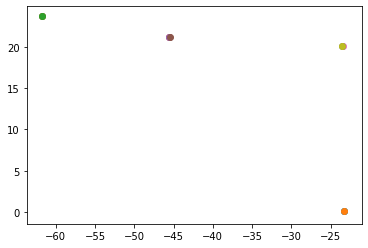

In [15]:
launch_times = []
launch_lons = []
launch_lats = []
launch_ids = []

for drifters_point in drifters_list:
    for drifter in drifters_point:
        print(drifter)
        df = pd.read_csv(drifter, parse_dates=[['date', 'time']])
        launch_times.append(str(df['date_time'][0]))
        launch_lons.append(df['longitude'][0])
        launch_lats.append(df['latitude'][0])
        launch_ids.append(drifter.split('.')[0].split('-')[-1])
        plt.scatter(df['longitude'][0], df['latitude'][0])

In [16]:
launch_times

['2018-03-12 06:59:59',
 '2018-03-12 07:01:00',
 '2018-03-12 06:41:00',
 '2018-03-15 07:10:00',
 '2018-03-15 07:05:59',
 '2018-03-15 01:30:59',
 '2018-03-22 00:17:00',
 '2018-03-22 06:00:59',
 '2018-03-22 06:00:00',
 '2018-03-29 06:00:59',
 '2018-03-29 06:00:00',
 '2018-03-29 06:10:00']

In [17]:
launch_lons

[-61.719269999999995,
 -61.714690000000004,
 -61.72165,
 -45.58835,
 -45.58948,
 -45.5047,
 -23.45297,
 -23.54404,
 -23.54959,
 -23.35596,
 -23.35458,
 -23.3573]

In [18]:
launch_ids

['2591504',
 '2593999',
 '2594008',
 '2588728',
 '2590462',
 '2592045',
 '2588898',
 '2591486',
 '2591972',
 '2586710',
 '2586817',
 '2591355']

In [25]:

from parcels import FieldSet, ParticleSet, JITParticle, AdvectionRK4, ErrorCode
from datetime import timedelta, datetime
from glob import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import colors 

import cartopy
import cartopy.crs as ccrs
#from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter#
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker


In [26]:
dz = np.load('Miron_type-1_ini.npz')

In [27]:
dz['launch_lons']

array([-61.71927, -61.71469, -61.72165, -45.58835, -45.58948, -45.5047 ,
       -23.45297, -23.54404, -23.54959, -23.35596, -23.35458, -23.3573 ])

# Have to adapt it to the first location of drifter that falls in domain for d3 and d4 as their inital positions fall out of the domain 
--> Northeast Extension cruise in the North Atlantic on 11 (1), 14 (2), 20 (3), and 28 (4) March 2018. (d1 to d4 from left to right)

# --> not really worth plotting them separately

In [28]:
import cartopy
import cartopy.feature as cpf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from shapely import geometry
from collections import namedtuple
from shapely.geometry.polygon import LinearRing

In [29]:
Region = namedtuple('Region',field_names=['region_name','lonmin','lonmax','latmin','latmax'])

region = Region(
    region_name="all_region",
    lonmin = -99.,
    lonmax = -46.,
    latmin = 5.0,
    latmax = 30.,
)

In [30]:
def add_sub_region_box(ax, subregion, color='r'):
    """ Source
    https://stackoverflow.com/questions/55303911/add-polygon-box-to-cartopy-python
    https://groups.google.com/g/scitools-iris/c/LxR0EbQolyE?pli=1
    """
    geom = geometry.box(minx=subregion.lonmin,maxx=subregion.lonmax,miny=subregion.latmin,maxy=subregion.latmax)
    ax.add_geometries([geom], crs=cartopy.crs.PlateCarree(), edgecolor=color, facecolor='None', linewidth=3) # , alpha=0.3
    return ax

/data/oceanparcels/input_data/Miron_etal_2020/data/d1/type-1_id-2591504.csv


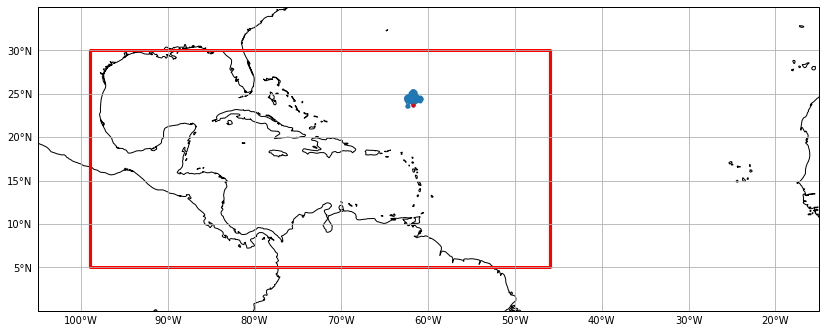

/data/oceanparcels/input_data/Miron_etal_2020/data/d1/type-1_id-2593999.csv


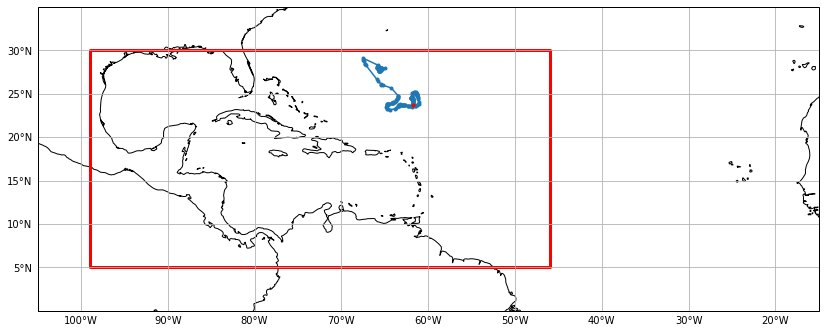

/data/oceanparcels/input_data/Miron_etal_2020/data/d1/type-1_id-2594008.csv


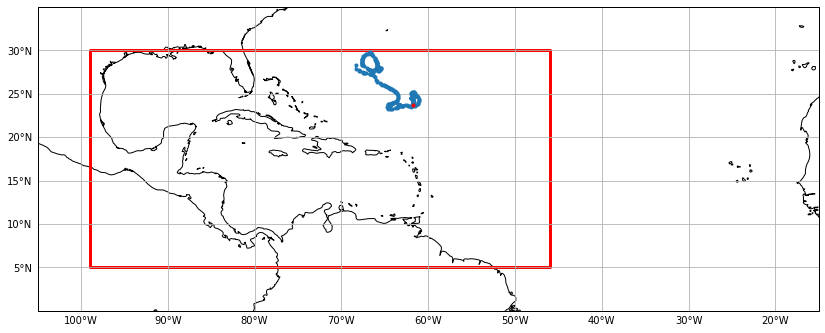

/data/oceanparcels/input_data/Miron_etal_2020/data/d2/type-1_id-2588728.csv


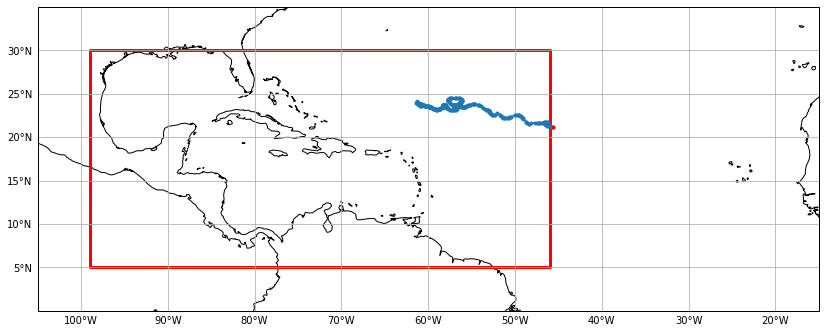

/data/oceanparcels/input_data/Miron_etal_2020/data/d2/type-1_id-2590462.csv


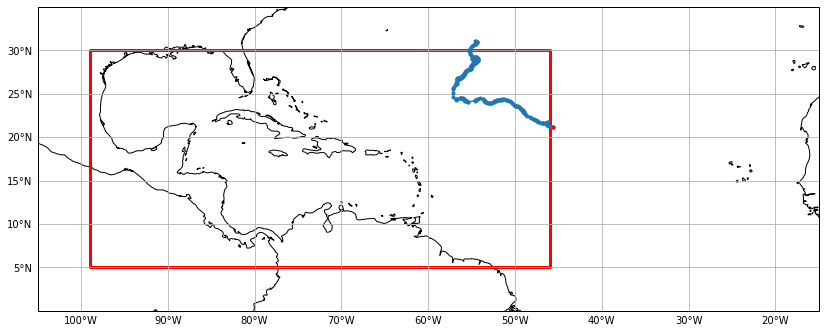

/data/oceanparcels/input_data/Miron_etal_2020/data/d2/type-1_id-2592045.csv


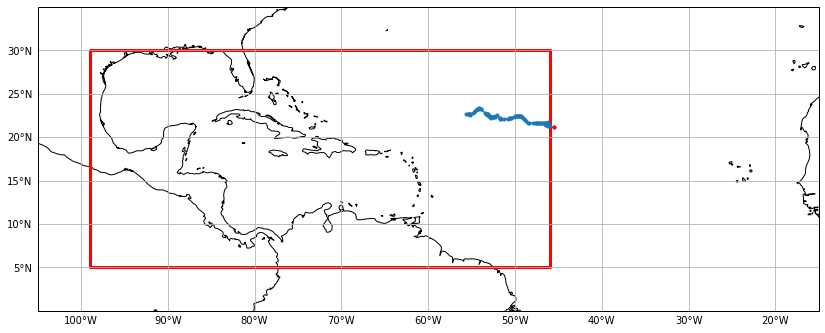

/data/oceanparcels/input_data/Miron_etal_2020/data/d3/type-1_id-2588898.csv


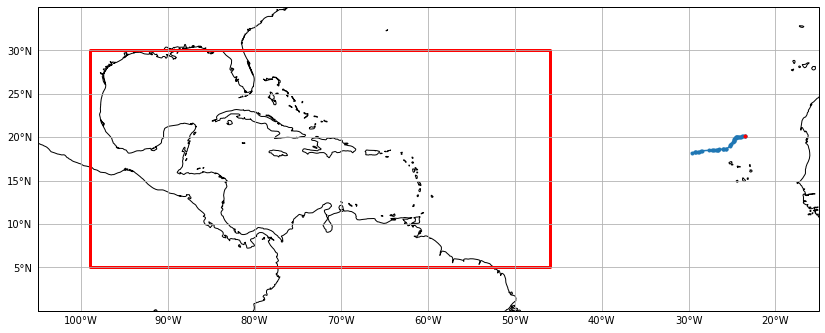

/data/oceanparcels/input_data/Miron_etal_2020/data/d3/type-1_id-2591486.csv


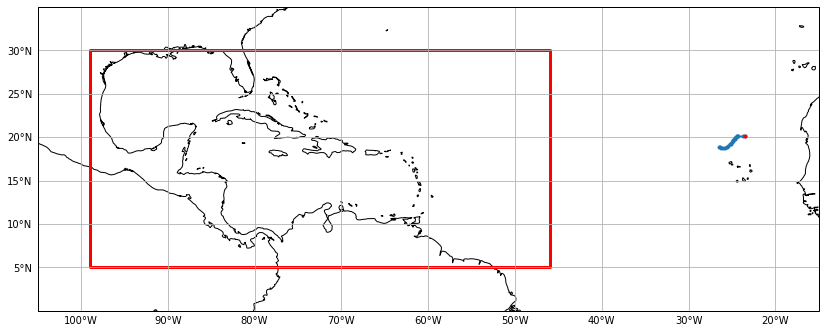

/data/oceanparcels/input_data/Miron_etal_2020/data/d3/type-1_id-2591972.csv


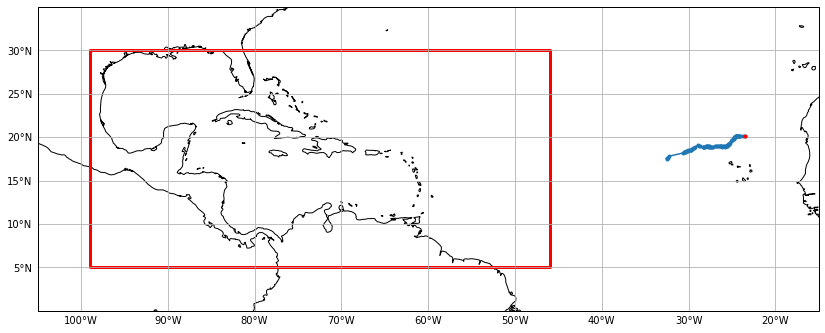

/data/oceanparcels/input_data/Miron_etal_2020/data/d4/type-1_id-2586710.csv


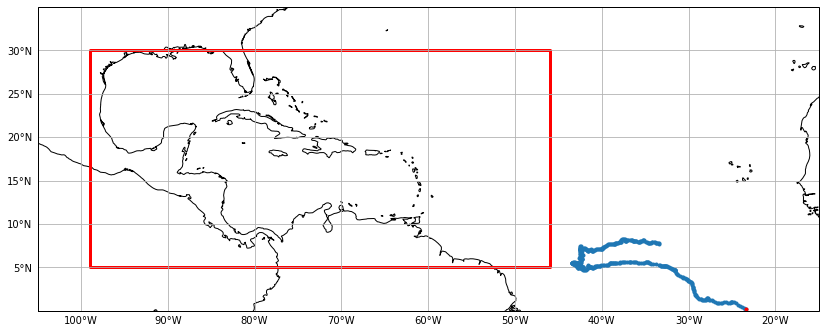

/data/oceanparcels/input_data/Miron_etal_2020/data/d4/type-1_id-2586817.csv


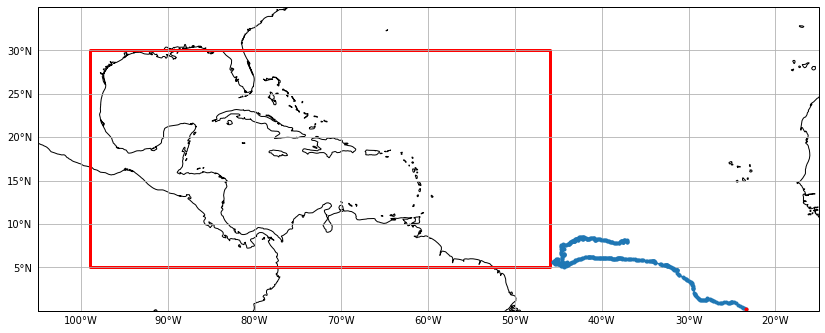

/data/oceanparcels/input_data/Miron_etal_2020/data/d4/type-1_id-2591355.csv


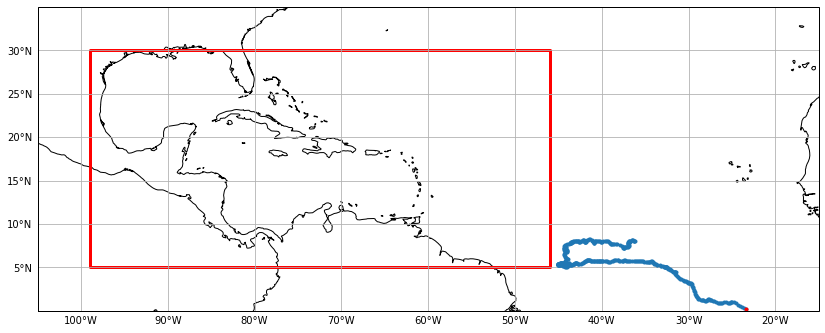

In [31]:
for drifters_point in drifters_list:
    for drifter in drifters_point:
        print(drifter)
        df = pd.read_csv(drifter, parse_dates=[['date', 'time']])

        plt.figure(figsize=(14,10)) #(17,5)
        ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
        ax1.coastlines(resolution='50m')
        #ax1.add_feature(cartopy.feature.LAND, facecolor='black')
        plt.plot(df['longitude'], df['latitude'], '.-', transform=ccrs.PlateCarree()) #marker='o'
        plt.plot(df['longitude'][0], df['latitude'][0], '.r', transform=ccrs.PlateCarree()) #marker='o'
        ax1.set_xlim([-105, -15])
        ax1.set_ylim([0., 35])
        add_sub_region_box(ax1, region)
        gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
        gl.xlabels_top = False
        gl.ylabels_right = False
        gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        
        plt.show()
        
    

# --> yes, d3 and d4 not worth using!

# Types of drifters:
- 0: svp without drogue
- 1: sargassum-like mats    
- 2: small sphere 
- 3: square
- 4: cube
- 5: large sphere
- 6: svp

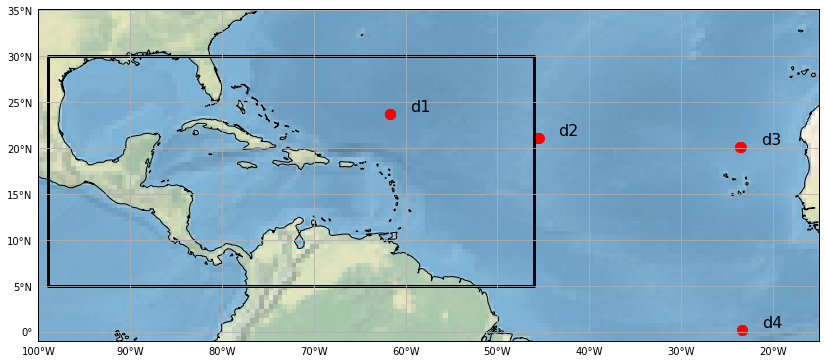

In [37]:
plt.figure(figsize=(14,10)) #(17,5)

###################
# Non-tidal:

ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
#ax1.add_feature(cartopy.feature.LAND, facecolor='black')
ax1.scatter(dz['launch_lons'], dz['launch_lats'], s=100, c='r', transform=ccrs.PlateCarree()) #marker='o'
ax1.text(dz['launch_lons'][0]+2.2, dz['launch_lats'][0]+.3, 'd1', transform=ccrs.PlateCarree(), size=16)
ax1.text(dz['launch_lons'][3]+2.2, dz['launch_lats'][3]+.3, 'd2', transform=ccrs.PlateCarree(), size=16)
ax1.text(dz['launch_lons'][6]+2.2, dz['launch_lats'][6]+.3, 'd3', transform=ccrs.PlateCarree(), size=16)
ax1.text(dz['launch_lons'][9]+2.2, dz['launch_lats'][9]+.3, 'd4', transform=ccrs.PlateCarree(), size=16)
ax1.set_xlim([-100.1, -15])
ax1.set_ylim([-1., 35.1])
add_sub_region_box(ax1, region, color='k')

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

gl.xlabels_top = False
gl.ylabels_right = False
# #gl.xlines = False
gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35, 40])
#gl.xlocator = mticker.FixedLocator([-90, -80, -70, -60, -50, -40, -30, -20])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
# gl.xlabel_style = {'size': 15, 'color': 'gray'}
# gl.xlabel_style = {'color': 'red', 'weight': 'bold'}


ax1.stock_img()



/data/oceanparcels/input_data/Miron_etal_2020/data/d1/type-1_id-2591504.csv
/data/oceanparcels/input_data/Miron_etal_2020/data/d1/type-1_id-2593999.csv
/data/oceanparcels/input_data/Miron_etal_2020/data/d1/type-1_id-2594008.csv
/data/oceanparcels/input_data/Miron_etal_2020/data/d2/type-1_id-2588728.csv
/data/oceanparcels/input_data/Miron_etal_2020/data/d2/type-1_id-2590462.csv
/data/oceanparcels/input_data/Miron_etal_2020/data/d2/type-1_id-2592045.csv
/data/oceanparcels/input_data/Miron_etal_2020/data/d3/type-1_id-2588898.csv
/data/oceanparcels/input_data/Miron_etal_2020/data/d3/type-1_id-2591486.csv
/data/oceanparcels/input_data/Miron_etal_2020/data/d3/type-1_id-2591972.csv
/data/oceanparcels/input_data/Miron_etal_2020/data/d4/type-1_id-2586710.csv
/data/oceanparcels/input_data/Miron_etal_2020/data/d4/type-1_id-2586817.csv
/data/oceanparcels/input_data/Miron_etal_2020/data/d4/type-1_id-2591355.csv


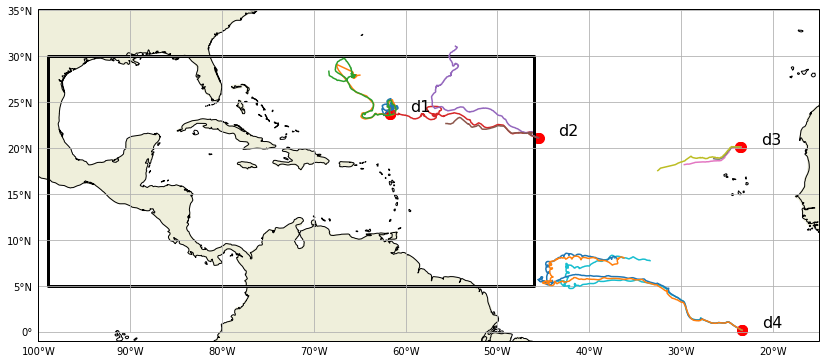

In [41]:

plt.figure(figsize=(14,10)) #(17,5)
ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
ax1.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'])


ax1.scatter(dz['launch_lons'], dz['launch_lats'], s=100, c='r', transform=ccrs.PlateCarree()) #marker='o'
ax1.text(dz['launch_lons'][0]+2.2, dz['launch_lats'][0]+.3, 'd1', transform=ccrs.PlateCarree(), size=16)
ax1.text(dz['launch_lons'][3]+2.2, dz['launch_lats'][3]+.3, 'd2', transform=ccrs.PlateCarree(), size=16)
ax1.text(dz['launch_lons'][6]+2.2, dz['launch_lats'][6]+.3, 'd3', transform=ccrs.PlateCarree(), size=16)
ax1.text(dz['launch_lons'][9]+2.2, dz['launch_lats'][9]+.3, 'd4', transform=ccrs.PlateCarree(), size=16)

ax1.set_xlim([-100.1, -15])
ax1.set_ylim([-1., 35.1])
add_sub_region_box(ax1, region, color='k')
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
        
for drifters_point in drifters_list:
    for drifter in drifters_point:
        print(drifter)
        df = pd.read_csv(drifter, parse_dates=[['date', 'time']])

        plt.plot(df['longitude'], df['latitude'], '-', transform=ccrs.PlateCarree()) #marker='o'

        
plt.show()
plt.close()
    

# Plotting all drifter types:

In [84]:
!ls /data/oceanparcels/input_data/Miron_etal_2020/data/d3

type-0_id-4101645.csv  type-1_id-2591486.csv  type-6_id-4101641.csv
type-1_id-2588898.csv  type-1_id-2591972.csv


In [85]:
drifters_list_d1 = [filedir_Miron + 'd1/' + 'type-0_id-4101647.csv',
                    filedir_Miron + 'd1/' + 'type-6_id-4101642.csv',
                    filedir_Miron + 'd1/' + 'type-1_id-2591504.csv',
                    filedir_Miron + 'd1/' + 'type-1_id-2593999.csv',
                    filedir_Miron + 'd1/' + 'type-1_id-2594008.csv']

In [86]:
drifters_list_d2 = [filedir_Miron + 'd2/' + 'type-0_id-4101644.csv',
                    filedir_Miron + 'd2/' + 'type-6_id-4101643.csv',
                    filedir_Miron + 'd2/' + 'type-1_id-2588728.csv',
                    filedir_Miron + 'd2/' + 'type-1_id-2590462.csv',
                    filedir_Miron + 'd2/' + 'type-1_id-2592045.csv']

In [87]:
drifters_list_d3 = [filedir_Miron + 'd3/' + 'type-0_id-4101645.csv',
                    filedir_Miron + 'd3/' + 'type-6_id-4101641.csv',
                    filedir_Miron + 'd3/' + 'type-1_id-2588898.csv',
                    filedir_Miron + 'd3/' + 'type-1_id-2591486.csv',
                    filedir_Miron + 'd3/' + 'type-1_id-2591972.csv']

In [88]:
drifters_list_d4 = [filedir_Miron + 'd4/' + 'type-0_id-4101646.csv',
                    filedir_Miron + 'd4/' + 'type-6_id-4101640.csv',
                    filedir_Miron + 'd4/' + 'type-1_id-2586710.csv',
                    filedir_Miron + 'd4/' + 'type-1_id-2586817.csv',
                    filedir_Miron + 'd4/' + 'type-1_id-2591355.csv']

In [89]:
drifters_list = [drifters_list_d1, drifters_list_d2, drifters_list_d3, drifters_list_d4]

/data/oceanparcels/input_data/Miron_etal_2020/data/d1/type-0_id-4101647.csv
2018-03-11 12:00:00
5327
/data/oceanparcels/input_data/Miron_etal_2020/data/d1/type-6_id-4101642.csv
2018-03-11 12:00:00
5336
/data/oceanparcels/input_data/Miron_etal_2020/data/d1/type-1_id-2591504.csv
2018-03-12 06:59:59
182
/data/oceanparcels/input_data/Miron_etal_2020/data/d1/type-1_id-2593999.csv
2018-03-12 07:01:00
181
/data/oceanparcels/input_data/Miron_etal_2020/data/d1/type-1_id-2594008.csv
2018-03-12 06:41:00
298
/data/oceanparcels/input_data/Miron_etal_2020/data/d2/type-0_id-4101644.csv
2018-03-14 20:00:00
5166
/data/oceanparcels/input_data/Miron_etal_2020/data/d2/type-6_id-4101643.csv
2018-03-14 21:00:00
5249
/data/oceanparcels/input_data/Miron_etal_2020/data/d2/type-1_id-2588728.csv
2018-03-15 07:10:00
376
/data/oceanparcels/input_data/Miron_etal_2020/data/d2/type-1_id-2590462.csv
2018-03-15 07:05:59
285
/data/oceanparcels/input_data/Miron_etal_2020/data/d2/type-1_id-2592045.csv
2018-03-15 01:30:59


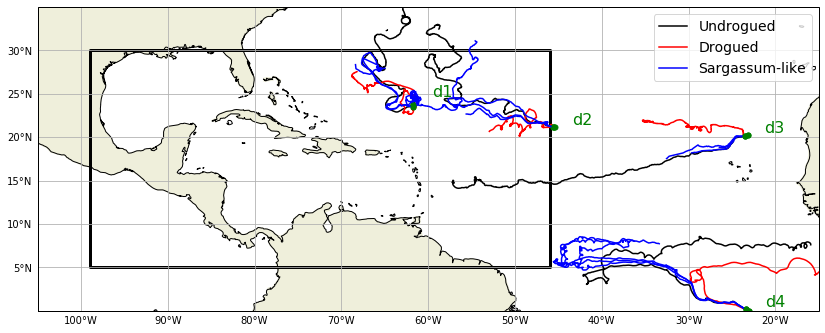

In [78]:
plt.figure(figsize=(14,10)) #(17,5)
ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
ax1.add_feature(cartopy.feature.LAND, facecolor=cartopy.feature.COLORS['land'])
ax1.set_xlim([-105, -15])
ax1.set_ylim([0., 35])
add_sub_region_box(ax1, region, color='k')
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# ax1.scatter(dz['launch_lons'], dz['launch_lats'], s=100, c='r', transform=ccrs.PlateCarree()) #marker='o'
ax1.text(dz['launch_lons'][0]+2.2, dz['launch_lats'][0]+1, 'd1', transform=ccrs.PlateCarree(), size=16, color='g')
ax1.text(dz['launch_lons'][3]+2.2, dz['launch_lats'][3]+.35, 'd2', transform=ccrs.PlateCarree(), size=16, color='g')
ax1.text(dz['launch_lons'][6]+2.2, dz['launch_lats'][6]+.35, 'd3', transform=ccrs.PlateCarree(), size=16, color='g')
ax1.text(dz['launch_lons'][9]+2.2, dz['launch_lats'][9]+.35, 'd4', transform=ccrs.PlateCarree(), size=16, color='g')

for jj in range(0,len(drifters_list)):
    drifters_point = drifters_list[jj]
    for ii in range(0, len(drifters_point)): #for drifter in drifters_point:
        if ii == 0:
            dcolor = 'k'
            dlabel = 'Undrogued'
        elif ii == 1:
            dcolor = 'r'
            dlabel = 'Drogued'
        else:
            dcolor = 'b'
            dlabel = 'Sargassum-like'
        
        drifter = drifters_point[ii]
        print(drifter)

        df = pd.read_csv(drifter, parse_dates=[['date', 'time']])
        print(df['date_time'][0])
        print(len(df['date_time'][:]))
        if (jj==1) & (ii<3):
            plt.plot(df['longitude'], df['latitude'], '-', c=dcolor, transform=ccrs.PlateCarree(), label=dlabel) #marker='o'
        else:
            plt.plot(df['longitude'], df['latitude'], '-', c=dcolor, transform=ccrs.PlateCarree()) #marker='o'
        plt.plot(df['longitude'][0], df['latitude'][0], '.g', transform=ccrs.PlateCarree(), markersize=10) #marker='o'
plt.legend(fontsize=14)        
plt.show()
        
    

In [52]:
drifters_point 

['/data/oceanparcels/input_data/Miron_etal_2020/data/d4/type-1_id-2586710.csv',
 '/data/oceanparcels/input_data/Miron_etal_2020/data/d4/type-1_id-2586817.csv',
 '/data/oceanparcels/input_data/Miron_etal_2020/data/d4/type-1_id-2591355.csv']

In [72]:
df

,date_time,longitude,latitude
0,2018-03-11 12:00:00,-61.728,23.518
1,2018-03-11 12:59:59,-61.729,23.524
2,2018-03-11 14:00:00,-61.731,23.532
3,2018-03-11 15:00:00,-61.733,23.542
4,2018-03-11 15:59:59,-61.736,23.553
5,2018-03-11 17:00:00,-61.737,23.564
6,2018-03-11 18:00:00,-61.737,23.575
7,2018-03-11 18:59:59,-61.736,23.585
8,2018-03-11 20:00:00,-61.735,23.597
9,2018-03-11 21:00:00,-61.732,23.606
